## Demo - Fetching Book Categories Using Beautiful Soup

In this demo, you will learn how to fetch book categories from website goodreads.com using Beautiful Soup.

<h3>1. Importing Libraries

In [8]:
!pip install bs4
!pip install requests

In [1]:
import requests 
from bs4 import BeautifulSoup
import csv #for saving data to csv 

<h3>2. Sending Request

In [3]:
r = requests.get('https://www.ebooks.com/en-tn/') # https://www.goodreads.com/
r.status_code  # status code 200 defines Success - OK

200

<h3>3. Inspecting Webpage

- Navigate to the Categories

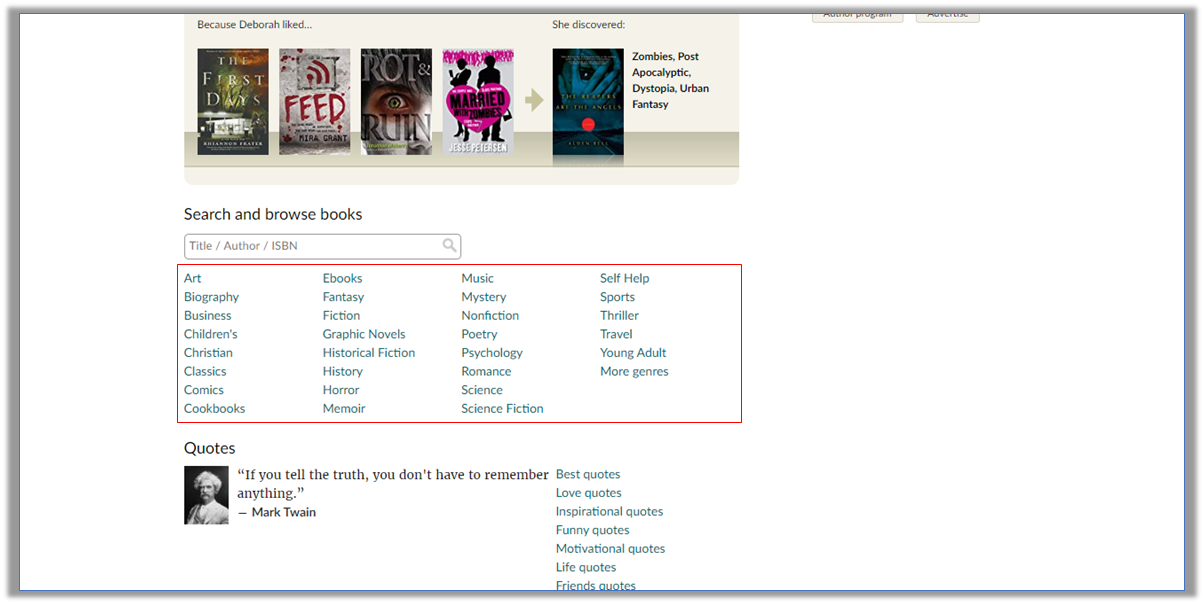

- Inspect any one of the categories

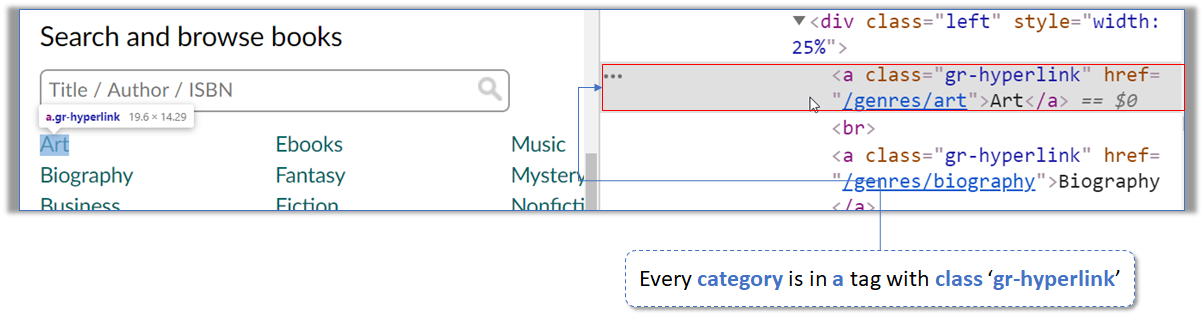

<h3>4. Parsing the data

In [5]:
c = r.content
print(c)

b'<!DOCTYPE html>\r\n\r\n    <html lang="en-tn">\r\n\r\n<head>\r\n    <meta charset="utf-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0" />\r\n    <title>eBooks.com: Buy Fiction, Non-Fiction, and Textbooks Online</title>\r\n\r\n    <link rel="shortcut icon" href="/favicon.ico" />\r\n    <link href="/icon-120x120.png" rel="apple-touch-icon" />\r\n    <link href="/icon-152x152.png" rel="apple-touch-icon" sizes="152x152" />\r\n    <link href="/icon-167x167.png" rel="apple-touch-icon" sizes="167x167" />\r\n    <link href="/icon-180x180.png" rel="apple-touch-icon" sizes="180x180" />\r\n    <link href="/icon-192x192.png" rel="icon" sizes="192x192" />\r\n    <link href="/icon-128x128.png" rel="icon" sizes="128x128" />\r\n    <link rel="manifest" href="/manifest.webmanifest" />\r\n    <link rel="preload" href="/css/ebooks.min.css?v=407uY2OHSrO_JTp091O_Cv1KPHyDb9TVvrvMH6AYecA" as="style" />\r\n    <link rel="preload" href="/font

In [8]:
book_soup = BeautifulSoup(r.content, 'html.parser')
print(book_soup.prettify())
#categories=book_soup.find_all('a',attrs={'class':'gr-hyperlink'})
#categories

<!DOCTYPE html>
<html lang="en-tn">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0" name="viewport"/>
  <title>
   eBooks.com: Buy Fiction, Non-Fiction, and Textbooks Online
  </title>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/icon-120x120.png" rel="apple-touch-icon"/>
  <link href="/icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="/icon-167x167.png" rel="apple-touch-icon" sizes="167x167"/>
  <link href="/icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/icon-192x192.png" rel="icon" sizes="192x192"/>
  <link href="/icon-128x128.png" rel="icon" sizes="128x128"/>
  <link href="/manifest.webmanifest" rel="manifest"/>
  <link as="style" href="/css/ebooks.min.css?v=407uY2OHSrO_JTp091O_Cv1KPHyDb9TVvrvMH6AYecA" rel="preload"/>
  <link as="font" crossorigin="" href="/font/ebkicon/fonts/ebkicon.ttf?g7q89i" rel="preload"/>
  <link href="https://www.goog

In [11]:
# Step3:  extract specific information 
titles=book_soup.find_all('h2') # Finding all the <h2> tags in the html    
#,attrs={'class':'gr-hyperlink'})
titles

[<h2 class="bottom-shadow visible-xs">Featured Titles</h2>,
 <h2 class="bottom-shadow visible-xs">Just Arrived</h2>,
 <h2 class="bottom-shadow visible-xs">Bestsellers</h2>,
 <h2 class="bottom-shadow visible-xs">What We're Reading</h2>,
 <h2 class="bottom-shadow">Best sellers in...</h2>,
 <h2 class="bottom-shadow">Movie Tie - Ins</h2>,
 <h2 class="bottom-shadow">Thrillers To Tingle Your Spine</h2>]

In [12]:
# step3 :   save into a csv file 
with open('title.csv', mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Title'])
    for title in titles:
        writer.writerow([title.text])
    print(title.text)

Thrillers To Tingle Your Spine


<h3>5. Oragnizing the data</h3>
<ul><li> We only need the categories, rest of the data is useless</li>
    <li> Each category have hyperlink to respective genres

In [10]:
txt_categories=[]
for tag in categories:
    if 'genres' in tag.get('href'):
        txt_categories.append(tag.string)

<h3>6. Printing the data

In [11]:
for category in txt_categories:
    print(category)

Art
Biography
Business
Children's
Christian
Classics
Comics
Cookbooks
Ebooks
Fantasy
Fiction
Graphic Novels
Historical Fiction
History
Horror
Memoir
Music
Mystery
Nonfiction
Poetry
Psychology
Romance
Science
Science Fiction
Self Help
Sports
Thriller
Travel
Young Adult
More genres


##### Conclusion: This code demonstrate how to fetch data from websites using Beautiful Soup.